In [ ]:
#E7
#Bad FOVs: 0/29,1/30,2
#Bad Genes Cx3cr1,

#E9.5
#bad FOVs: 10,11,15,12,14,23

In [139]:
import sys
sys.path.append(r'..//')
#from ioMicro import *
import pandas as pd


def plot_gene_mosaic_cells(df,cell_df,gene,plt_fov=False,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20,viewer=None):
    cell_df_ = cell_df
    xcells,ycells=cell_df_['x_um_abs'],cell_df_['y_um_abs']
    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    vols = cell_df_['volm']
    
    cts = np.array(df[gene])#Ptbp1_smFISH
    cts[np.isnan(cts)]=0
    cts = cts/vols*np.median(vols)
    
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)
    import napari
    good_cells = slice(None)
    good_cells = np.argsort(cts)
    names_cells = np.array(list(dff.index))[good_cells]
    XC = -Xcells[good_cells,::-1]
    if viewer is None:
        viewer = napari.view_points(XC,size=size[good_cells],face_color=cols[good_cells],name=gene)
    else:
        viewer.add_points(XC,size=size[good_cells],face_color=cols[good_cells],name=gene)
    if plt_fov:
        #ifovs = np.array(list(df.index),dtype=int)//10**5
        ifovs = [int(nm.split('_')[-2]) for nm in names_cells]
        ifov_unk = np.unique(ifovs)
        Xfov = np.array([np.mean(XC[ifovs==ifov],axis=0)for ifov in ifov_unk])
        features =  {'fov':ifov_unk}
        text = {
            'string': '{fov:.0f}',
            'size': 20,
            'color': 'gray',
            'translation': np.array([0, 0]),
        }
        viewer.add_points(Xfov,text=text,features=features,edge_width=0)
    return viewer

In [145]:
dff3 = pd.read_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\dff_D9.npz_0p5thV3.pkl')
cell_df3 = pd.read_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\cell_df_D9.npz_0p5thV3.pkl')

In [146]:
dff2 = pd.read_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\dff_D9.npz_0p5thV2.pkl')
cell_df2= pd.read_pickle(r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames\cell_df_D9.npz_0p5thV2.pkl')

In [141]:

#dff['blankmax']=dff[[gn for gn in dff.columns if 'blank' in gn]].max(axis=1)
dff['blankmean']=dff[[gn for gn in dff.columns if 'blank' in gn]].mean(axis=1)
dff['blankperc']=np.percentile(dff[[gn for gn in dff.columns if 'blank' in gn]],99,axis=1)

In [142]:
np.mean(dff['blankperc'])

1.5338357473397464

In [ ]:
#\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DataFrames

In [143]:
gns_all = np.sort([gn for gn in dff.columns if 'blank' not in gn])
print(list(gns_all))
blanks = np.sort([gn for gn in dff.columns if 'blank' in gn])
print(list(blanks))

['1110008P14Rik', '1500015O10Rik', '1810041L15Rik', '2310069B03Rik', '2610528A11Rik', '2900055J20Rik', '3110035E14Rik', '4833407H14Rik', '4930570B17Rik', '6330403K07Rik', '9630013A20Rik', 'A1cf', 'A230050P20Rik', 'A830009L08Rik', 'A930003A15Rik', 'Abca8a', 'Abcb1b', 'Abcb4', 'Abcg1', 'Abhd15', 'Abhd2', 'Abi3', 'Abi3bp', 'Acer3', 'Ache', 'Acsl3', 'Acta2', 'Actg1', 'Adamts1', 'Adamts5', 'Adamts9', 'Adamtsl4', 'Adarb2', 'Adcy1', 'Adcy2', 'Adcyap1', 'Adgra2', 'Adgrd1', 'Adgre1', 'Adgrl3', 'Adh1', 'Adora2a', 'Adora3', 'Afap1l2', 'Afp', 'Agpat2', 'Agrp', 'Agt', 'Ahcyl2', 'Ahi1', 'Ahnak', 'Aif1', 'Aif1l', 'Akain1', 'Alas2', 'Alb', 'Aldh1a1', 'Aldh1a2', 'Aldh1a7', 'Aldh1l1', 'Aldoa', 'Aldoc', 'Alox12', 'Alox5ap', 'Alx1', 'Alyref', 'Ambra1', 'Amd2', 'Amot', 'Amz1', 'Angpt1', 'Ank2', 'Ankk1', 'Ankrd11', 'Anks6', 'Anln', 'Anp32e', 'Anxa2', 'Anxa5', 'Aoah', 'Ap3s1', 'Apln', 'Apoa1', 'Apoa2', 'Apoc2', 'Apod', 'Apoe', 'Apoo', 'Aqp1', 'Aqp2', 'Aqp3', 'Aqp4', 'Aqp8', 'Arg1', 'Arhgap10', 'Arhgap27', 'A

In [148]:
gene = 'Cald1'
#['Malat1', 'H19', 'Col1a1', 'Dpysl3', 'Meg3', 'Ptprs', 'Mapt', 'Dpysl2', 'Gnb1', 'Ywhae', 'Col3a1', 'Sox4', 'Nfix', 'Serpinh1', 'Sparc', 'Agt', 'Nedd4', 'Nnat', 'Ina', 'Xist', 'Uchl1', 'Islr2', 'Igfbpl1', 'Elavl3', 'Sdc3', 'Rab6b', 'Gpm6a', 'Cntf', 'Ndn', 'Csdc2']:
viewer = plot_gene_mosaic_cells(dff2,cell_df2,gene,plt_fov=True,transpose=1,flipx=1,flipy=1,sz_min=5,sz_max=10,nmax=20)
if False:
    im = viewer.screenshot(size=(5000,5000))
    viewer.close()
    #cv2.imwrite(svfld+os.sep+gene+'_D14.png',im[:,:,[2,1,0,3]])

### Prepare scdata

In [4]:
dff.columns

Index(['1110008P14Rik', '1500015O10Rik', '1810041L15Rik', '2310069B03Rik',
       '2610528A11Rik', '2900055J20Rik', '3110035E14Rik', '4833407H14Rik',
       '4930570B17Rik', '6330403K07Rik',
       ...
       'blank0455-p711', 'blank0456-p711', 'blank0457-p711', 'blank0458-p711',
       'blank0459-p711', 'blank0460-p711', 'blank0461-p711', 'blank0462-p711',
       'blank0463-p711', 'blank0464-p711'],
      dtype='object', length=4384)

In [5]:
#import scanpy as sc
genes = [gn for gn in dff.columns if 'blank' not in gn]
genes_blank = [gn for gn in dff.columns if 'blank' in gn]

In [6]:
cell_df

,cell_id,volm,zc,xc,yc,z_um_abs,x_um_abs,y_um_abs
Conv_zscan__33_3300290,3300290.0,6261.0,0.905606,586.339111,626.864380,0.724485,1423.312988,838.011475
Conv_zscan__33_3300432,3300432.0,4119.0,0.474387,900.277222,1190.144165,0.379510,1491.330811,960.051697
Conv_zscan__33_3300433,3300433.0,5013.0,1.012767,859.564331,99.225815,0.810213,1482.510010,723.693298
Conv_zscan__33_3300450,3300450.0,12346.0,2.395594,890.767029,157.311920,1.916475,1489.270386,736.278259
Conv_zscan__33_3300471,3300471.0,8770.0,3.604447,925.210815,127.502510,2.883558,1496.732910,729.819763
...,...,...,...,...,...,...,...,...
Conv_zscan__44_5702040,5702040.0,8863.0,2.000000,941.771423,1400.121704,1.600000,2391.010254,1302.586304
Conv_zscan__57_5702950,5702950.0,6117.0,5.549779,825.604736,264.760345,4.439824,2369.524658,1355.156372
Conv_zscan__57_5703873,5703873.0,4586.0,6.515700,729.575684,246.855652,5.212560,2348.719238,1351.277100
Conv_zscan__57_5704658,5704658.0,4399.0,9.559445,851.273926,435.252319,7.647556,2375.086182,1392.095215


In [10]:
import scanpy as sc
import numpy as np
import pandas as pd

In [96]:
scdata = sc.AnnData(dff[genes],obs=cell_df[['x_um_abs','y_um_abs']])

In [97]:
scdata

AnnData object with n_obs × n_vars = 25197 × 2042
    obs: 'x_um_abs', 'y_um_abs'

In [98]:
scdata = sc.AnnData(dff[genes],obs=cell_df[['volm','x_um_abs','y_um_abs','zc','xc','yc']])
scdata.obsm["blank"] = dff[genes_blank]
scdata.obsm["X_spatial"] = cell_df[['x_um_abs','y_um_abs']]
scdata.obsm["X_fov"] = cell_df[['zc','xc','yc']]
scdata.obsm["X_raw"] = dff[genes]
scdata.obsm["volume"] = cell_df['volm']
vols = np.array(scdata.obsm["volume"])
scdata.X = scdata.X/vols[:,np.newaxis]*np.median(vols)
counts_per_cell = np.sum(scdata.X,axis=1)
scdata=scdata[counts_per_cell>100]

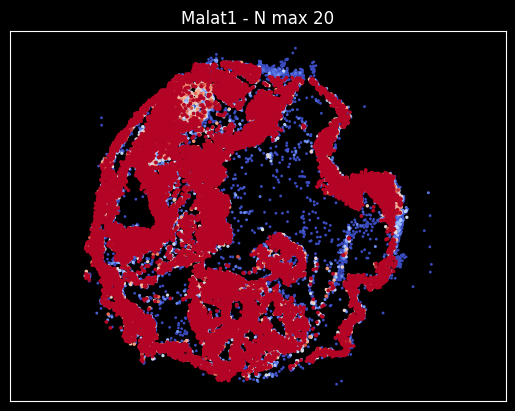

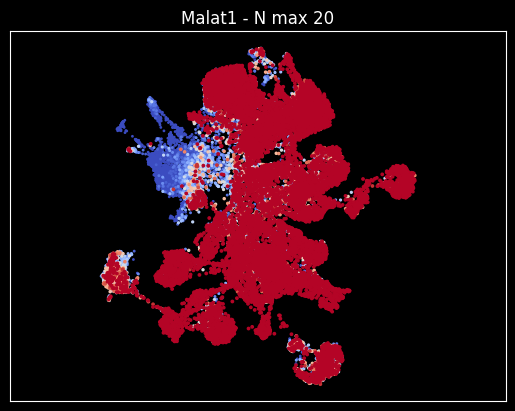

In [124]:
gene = 'Malat1'
fig = plot_gene_scdata(scdata,gene=gene,nmax=20,sz_min=1,sz_max=3,transpose=1,flipx=1,flipy=1,
                       tag='X_spatial',recompute_raw=False)#X_umap,X_spatial

fig = plot_gene_scdata(scdata,gene=gene,nmax=20,sz_min=1,sz_max=3,transpose=1,flipx=1,flipy=1,
                       tag='X_umap',recompute_raw=False)#X_umap,X_spatial

In [90]:
def plot_gene_scdata(scdata2,gene='SOX9',nmax=20,sz_min=5,sz_max=30,transpose=1,flipx=1,flipy=1,tag='X_spatial',recompute_raw=False):
    Xcells = np.array(scdata2.obsm[tag])[:,::transpose]*[flipx,flipy]
    ign = list(scdata2.var.index).index(gene)
    #scdata2.obsm['X_umap']
    if 'X_raw' not in scdata2.obsm or recompute_raw:
        Xnorm = (np.exp(scdata2.X)-1)
        ncts = np.sum(Xnorm,axis=1)[0]
        scdata2.obsm['X_raw']=np.round(Xnorm/ncts*np.array(scdata2.obs['total_counts'])[:,np.newaxis])
    cts = np.array(scdata2.obsm['X_raw'][gene]).copy()
    plt.style.use("dark_background")
    cts[np.isnan(cts)]=0
    #cts[cts>20]=0
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)

    good_cells = slice(None)
    good_cells = np.argsort(cts)

    #blanks = [gn for gn in df.columns if 'blank' in gn]
    #blanks_cts = np.nanmean(df[blanks],axis=-1)
    #good_cells = blanks_cts<th_blank

    XC = -Xcells[good_cells,::-1]
    #viewer = napari.view_points(XC,size=size[good_cells],face_color=cols[good_cells],name=gene)
    fig = plt.figure(facecolor='k')
    plt.title(gene+' - N max '+str(nmax))
    fig.set_facecolor('black')
    img = plt.scatter(XC[:,0],XC[:,1],c=cols[good_cells],s=size[good_cells])
    plt.grid(False)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar()
    #cbar = plt.colorbar(img,boundaries=[0, nmax], values=[0, 1],cmap='coolwarm')# boundaries=[0, nmax], values=[0, 1],cmap='coolwarm')
    #cbar.set_ticks([0, nmax])
    return fig

In [102]:
scdata.obs

,volm,x_um_abs,y_um_abs
Conv_zscan__33_3300433,5013.0,1482.510010,723.693298
Conv_zscan__33_3300482,7990.0,1500.681763,723.345154
Conv_zscan__33_3300522,9999.0,1487.653198,724.077454
Conv_zscan__33_3300547,13102.0,1522.152832,722.708862
Conv_zscan__33_3301434,6417.0,1527.722412,724.433716
...,...,...,...
Conv_zscan__57_5706699,9552.0,2367.666992,1485.667358
Conv_zscan__57_5706766,6338.0,2426.863525,1512.614990
Conv_zscan__57_5706768,4041.0,2428.891357,1561.335938
Conv_zscan__57_5707037,4726.0,2340.180176,1548.705811


In [106]:
scdata = sc.AnnData(dff[genes],obs=cell_df[['volm','x_um_abs','y_um_abs','zc','xc','yc']])
scdata.obsm["blank"] = dff[genes_blank]
scdata.obsm["X_spatial"] = cell_df[['x_um_abs','y_um_abs']]
scdata.obsm["X_fov"] = cell_df[['zc','xc','yc']]
scdata.obsm["X_raw"] = dff[genes]
sc.pp.calculate_qc_metrics(scdata, percent_top=None, inplace=True)

In [107]:
scdata

AnnData object with n_obs × n_vars = 25197 × 2042
    obs: 'volm', 'x_um_abs', 'y_um_abs', 'zc', 'xc', 'yc', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'blank', 'X_spatial', 'X_fov', 'X_raw'

In [109]:
sc.tl.umap(scdata,random_state=9)

In [108]:
#sc.pp.calculate_qc_metrics(scdata, percent_top=None, inplace=True)
sc.pp.normalize_total(scdata, target_sum=np.median(scdata.obs["total_counts"]))
sc.pp.log1p(scdata)
### potentially trim
sc.pp.pca(scdata,n_comps=100)
sc.pp.neighbors(scdata)#,use_rep = "X")
sc.tl.leiden(scdata, resolution=5)
sc.tl.umap(scdata,random_state=9)

C:\Users\BintuLabUser\anaconda3\envs\scanpy\Lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
C:\Users\BintuLabUser\anaconda3\envs\scanpy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

In [25]:
np.all(np.array(list(cell_df.index))==np.array(list(dff.index)))

True

In [ ]:
def get_scdata(dfR,cell_dfR,genes_prev=None,th_vol = 2500,th_volM=2500*5,pixel_size=0.10833*4,min_cts=10):
    import scanpy as sc
    genes = [gn for gn in dfR.columns if 'blank' not in gn]
    genes_blank = [gn for gn in dfR.columns if 'blank' in gn]
    if genes_prev is not None:
        genes = np.intersect1d(genes_prev,genes)
        
    dfR_ = dfR.copy()
    dfR_ = dfR_.replace(np.nan, 0)
    keep = (cell_dfR['volm']>th_vol)&(cell_dfR['volm']<th_volM)
    keep = keep&(np.nansum(dfR_,axis=-1)>min_cts)
    dfR_ = dfR_.loc[keep]
    cell_dfR_ = cell_dfR.loc[keep]
    scdata2 = sc.AnnData(dfR_[genes])
    scdata2.obsm["blank"] = np.array(dfR_[genes_blank])
    scdata2.obsm["X_spatial"] = get_Xcells(cell_dfR_,pixel_size =pixel_size ,transpose=1,flipx=1,flipy=1)
    scdata2.obsm["X_raw"] = scdata2.X.copy()
    scdata2.obsm["volume"] = np.array(cell_dfR_['volm'])
    #sc.pp.calculate_qc_metrics(scdata2, percent_top=None, inplace=True)
    #sc.pp.normalize_total(scdata2, target_sum=np.median(scdata2.obs["total_counts"]))
    #sc.pp.log1p(scdata2)
    #sc.pp.neighbors(scdata2,use_rep = "X")  #metric='correlation', use_rep = "X"
    #sc.tl.leiden(scdata2, resolution=2) 
    #sc.tl.umap(scdata2,random_state=9)
    #sc.pp.pca(scdata2)
    return scdata2